In [5]:
import pandas as pd
import numpy as np
import time

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score

import matplotlib.pyplot as plt


In [6]:
dfAdult = pd.read_csv(".\\data\\adult.csv")

# reshuffle input data ..good thing for neural netwrok
#dfAdult = dfAdult.sample(frac=1).reset_index(drop=True) 
dfAdultWithoutSalary = dfAdult.drop(columns=['salary'])
dfAdultHotEncoded = pd.get_dummies(dfAdult,columns=['salary','education','workclass','occupation','relationship','marital-status','race','sex'])
dfAdultHotEncoded = dfAdultHotEncoded.drop(columns=['salary_ <=50K','native-country'])
X_HotEncoded = dfAdultHotEncoded.drop('salary_ >50K',axis=1)
Y_HotEncoded = dfAdultHotEncoded['salary_ >50K']

label_encoding = preprocessing.LabelEncoder()
dfAdult['salary'] = label_encoding.fit_transform(dfAdult['salary'])
dfAdult['education'] = label_encoding.fit_transform(dfAdult['education'])
dfAdult['workclass'] = label_encoding.fit_transform(dfAdult['workclass'])
dfAdult['occupation'] = label_encoding.fit_transform(dfAdult['occupation'])
dfAdult['relationship'] = label_encoding.fit_transform(dfAdult['relationship'])
dfAdult['marital-status'] = label_encoding.fit_transform(dfAdult['marital-status'])
dfAdult['race'] = label_encoding.fit_transform(dfAdult['race'])
dfAdult['sex'] = label_encoding.fit_transform(dfAdult['sex'])
dfAdult['native-country']=label_encoding.fit_transform(dfAdult['native-country'])

X = dfAdult.drop('salary',axis=1)
Y = dfAdult['salary']
print(X.columns)
print(X.shape)

print(Y.shape)


#X=X_HotEncoded
#Y=Y_HotEncoded
#X = X[:, None]


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
(32561, 14)
(32561,)


In [7]:
def PlotElbowMethod(data):
    distortions = []   
    for i in range(1, 10):
        km = KMeans(
            n_clusters=i, init='random',
            n_init=10, max_iter=1000,
            tol=1e-04, random_state=0
        )
        km.fit(data)
        distortions.append(km.inertia_)
        
    # plot
    plt.plot(range(1, 10), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()
    

In [8]:
def PrintSilhouetteScore(data,actual_label):
    silhouette =[]
    homogeneity =[]
    completeness =[]
    for i in range(2, 10):
        km = KMeans(
            n_clusters=i, init='random',
            n_init=10, max_iter=1000,
            tol=1e-04, random_state=0
        )
        
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette.append(silhouette_avg)
        homogeneity_avg = homogeneity_score(actual_label, cluster_labels)
        homogeneity.append(homogeneity_avg)
        completeness_avg = completeness_score(actual_label, cluster_labels)
        completeness.append(completeness_avg)
       
        
    plt.plot(range(2, 10), silhouette, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('silhouette Score')
    plt.show()
    
    plt.plot(range(2, 10), homogeneity, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Homogenity Score')
    plt.show()
    
    plt.plot(range(2, 10), completeness, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Completeness Score')
    plt.show()
    

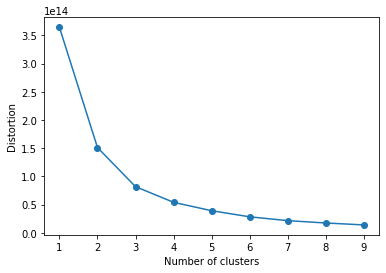

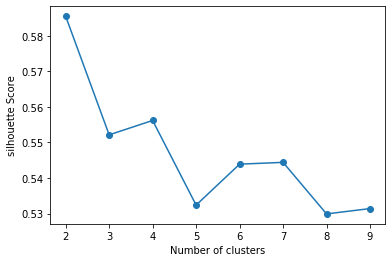

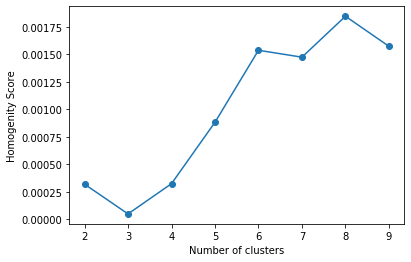

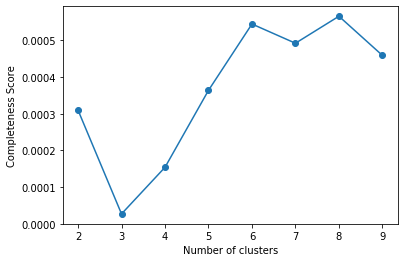

In [6]:
#optimal k value on one hot encoded dataset without groundtruth
PlotElbowMethod(X_HotEncoded)
PrintSilhouetteScore(X_HotEncoded,Y_HotEncoded)

In [9]:
dfMadelon_X = pd.read_csv(".\\data\\madelon_train.csv")
dfMadelon_Y1 = pd.read_csv(".\\data\\madelon_train_labels.csv")

dfMadelon_Y = dfMadelon_Y1['Predict']

dfMadelon = dfMadelon_X.copy()
dfMadelon["Predict"] = dfMadelon_Y
print(dfMadelon_X.shape)
print(dfMadelon_Y.shape)
print(dfMadelon.columns)


(2000, 500)
(2000,)
Index(['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9',
       'Col10',
       ...
       'Col492', 'Col493', 'Col494', 'Col495', 'Col496', 'Col497', 'Col498',
       'Col499', 'Col500', 'Predict'],
      dtype='object', length=501)


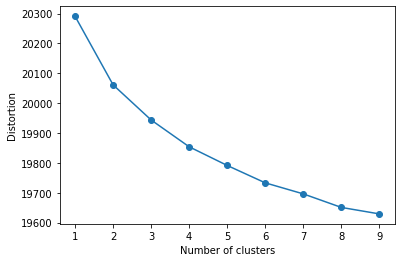

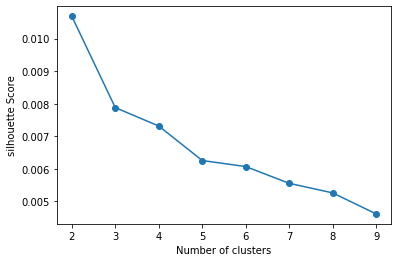

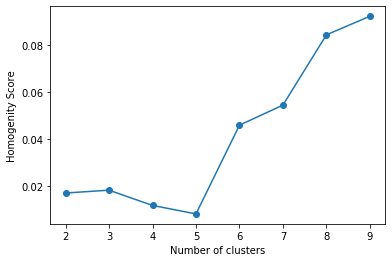

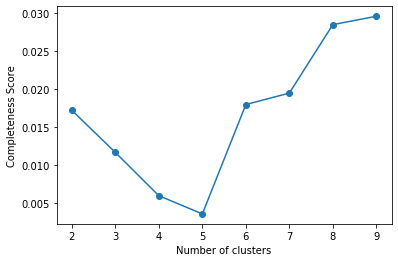

In [9]:
#scaled madeleon data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(dfMadelon_X)

PlotElbowMethod(X_scaled)
PrintSilhouetteScore(X_scaled,dfMadelon_Y)

In [10]:
def Plot2MeansCluster(X,y_km,km):
    plt.scatter(
        X[y_km == 0, 0], X[y_km == 0, 1],
        s=50, c='lightgreen',
        marker='s', edgecolor='black',
        label='cluster 1'
    )

    plt.scatter(
        X[y_km == 1, 0], X[y_km == 1, 1],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='cluster 2'
    )
    
    # plot the centroids
    plt.scatter(
        km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
        s=250, marker='*',
        c='red', edgecolor='black',
        label='centroids'
    )
    plt.legend(scatterpoints=1)
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.grid()
    plt.show()

In [11]:
def Plot3MeansCluster(X,y_km,km):
    plt.scatter(
        X[y_km == 0, 0], X[y_km == 0, 1],
        s=50, c='lightgreen',
        marker='s', edgecolor='black',
        label='cluster 1'
    )

    plt.scatter(
        X[y_km == 1, 0], X[y_km == 1, 1],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='cluster 2'
    )

    plt.scatter(
        X[y_km == 2, 0], X[y_km == 2, 1],
        s=50, c='lightblue',
        marker='v', edgecolor='black',
        label='cluster 3'
    )

    # plot the centroids
    plt.scatter(
        km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
        s=250, marker='*',
        c='red', edgecolor='black',
        label='centroids'
    )
    plt.legend(scatterpoints=1)
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.grid()
    plt.show()

<class 'pandas.core.frame.DataFrame'>
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')


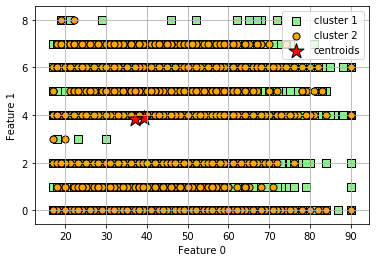

In [12]:
#ADULT DataSet Label Encoded
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)
print(type(X))
print(X.columns)
Plot2MeansCluster(X.values[:,:],y_km,km)

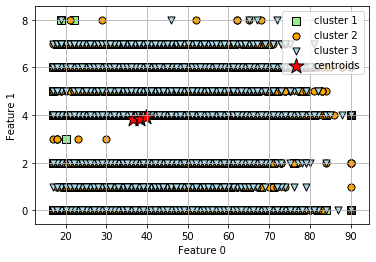

In [13]:
#ADULT DataSet Label Encoded without ground truth
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)
Plot3MeansCluster(X.values[:,:],y_km,km)

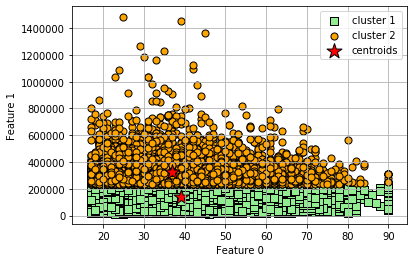

In [14]:
#ADULT DataSet Onehot Encoded without groundtruth
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X_HotEncoded)
Plot2MeansCluster(X_HotEncoded.values[:,:],y_km,km)

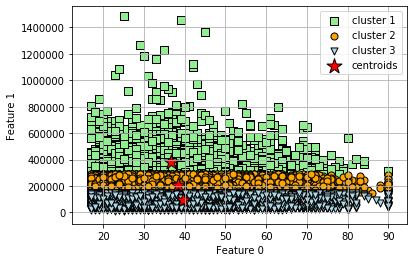

In [15]:
#ADULT DataSet Onehot Encoded without groudntruth
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X_HotEncoded)
Plot3MeansCluster(X_HotEncoded.values[:,:],y_km,km)

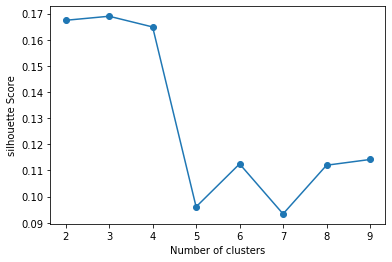

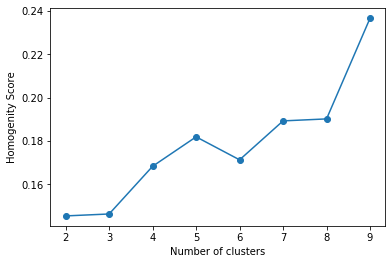

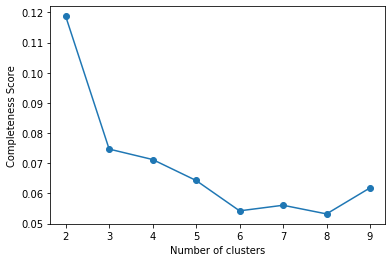

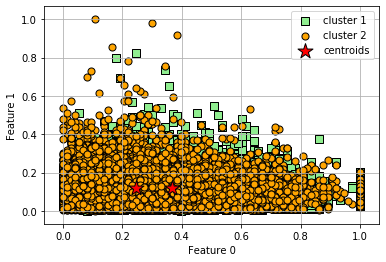

In [17]:
#Adult with One hot encoded scaled data and no groundtruth
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_scaled=scaler.fit_transform(X_HotEncoded)
PrintSilhouetteScore(X_scaled,Y_HotEncoded)
km = KMeans(
        n_clusters=2, init='random',
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
)
y_km = km.fit_predict(X_scaled)
Plot2MeansCluster(X_scaled,y_km,km)

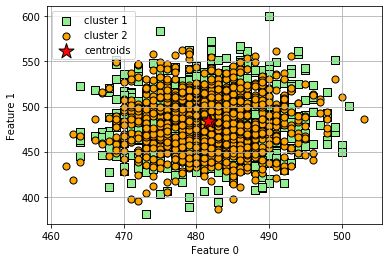

In [18]:
#Madelon without Groundtruth k =2
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(dfMadelon)
Plot2MeansCluster(dfMadelon.values[:,:],y_km,km)

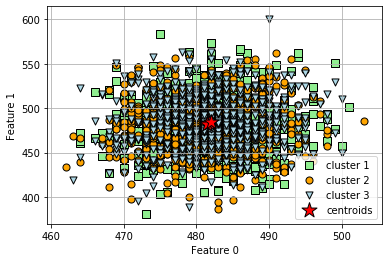

In [19]:
#Madelon without Groundtruth k =3
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(dfMadelon)
Plot3MeansCluster(dfMadelon.values[:,:],y_km,km)


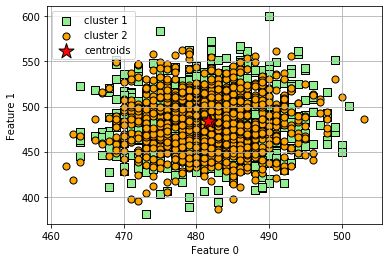

In [20]:
#Madelon without Groundtruth k =2
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(dfMadelon_X)
Plot2MeansCluster(dfMadelon_X.values[:,:],y_km,km)

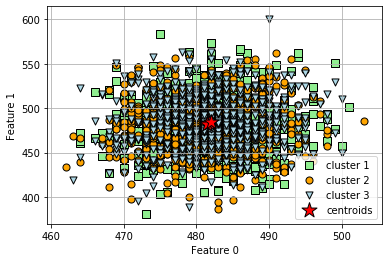

In [21]:
#Madelon with Groundtruth k =3
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(dfMadelon_X)
Plot3MeansCluster(dfMadelon_X.values[:,:],y_km,km)


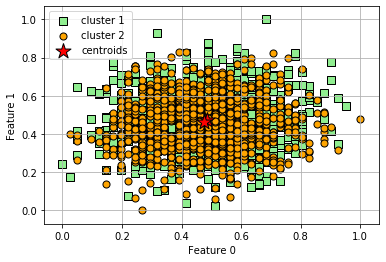

In [22]:
#2 cluster wth  scaled Madelon data and no groundtruth
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_scaled=scaler.fit_transform(dfMadelon_X)

km = KMeans(
        n_clusters=2, init='random',
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
)
y_km = km.fit_predict(X_scaled)
Plot2MeansCluster(X_scaled,y_km,km)

In [12]:
def Plot5MeansCluster(X,y_km,km,i,j):
    plt.scatter(
        X[y_km == 0, i], X[y_km == 0, j],
        s=50, c='lightgreen',
        marker='s', edgecolor='black',
        label='cluster 1'
    )

    plt.scatter(
        X[y_km == 1, i], X[y_km == 1, j],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='cluster 2'
    )

    plt.scatter(
        X[y_km == 2, i], X[y_km == 2, j],
        s=50, c='lightblue',
        marker='v', edgecolor='black',
        label='cluster 3'
    )
    plt.scatter(
        X[y_km == 3, j], X[y_km == 3, j],
        s=50, c='pink',
        marker='v', edgecolor='black',
        label='cluster 3'
    )
    plt.scatter(
        X[y_km == 4, i], X[y_km == 4, j],
        s=50, c='yellow',
        marker='v', edgecolor='black',
        label='cluster 3'
    )

    # plot the centroids
    plt.scatter(
        km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
        s=250, marker='*',
        c='red', edgecolor='black',
        label='centroids'
    )
    plt.legend(scatterpoints=1)
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.grid()
    plt.show()

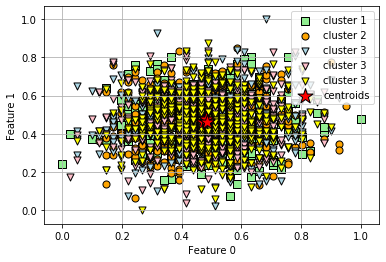

In [13]:
#2 cluster wth  scaled Madelon data and no groundtruth
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_scaled=scaler.fit_transform(dfMadelon_X)

km = KMeans(
        n_clusters=5, init='random',
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
)
y_km = km.fit_predict(X_scaled)
Plot5MeansCluster(X_scaled,y_km,km)